## Observações: Para este MVP, utilizei a plataforma Databricks (dbc-6ba4cdc0-9ce0.cloud.databricks.com) para realizar o processo de ETL e persistência em nuvem. No entanto, por utilizar a versão gratuita da ferramenta, o cluster e as tabelas ficam temporariamente desativados após períodos de inatividade. Por esse motivo, exportei e hospedei o resultado final do tratamento de dados diretamente no GitHub, mas há n o outro arquivo chamado Parte 1.py onde faço há tratamento pelo Databricks.

# Relatório de Análise de Churn – Empresa de Telecomunicações

## 1. Introdução e Objetivos

### 1.1 Introdução e Definição do Problema

O mercado de telecomunicações é altamente competitivo. A aquisição de novos clientes possui um custo significativamente maior do que a retenção dos clientes existentes. Nesse contexto, a taxa de evasão de clientes, conhecida como "Churn", é uma métrica vital para a saúde financeira e estratégica da empresa.

Este trabalho explora uma base de dados clássica da IBM, "Telco Customer Churn", para identificar os principais fatores que levam um cliente a cancelar seu contrato.

### 1.2 Descrição do Problema e Objetivos

O problema central é diagnosticar as causas-raiz da taxa de churn. A empresa precisa de respostas claras para direcionar seus esforços de retenção de forma eficaz.

Os objetivos específicos deste projeto são:

* **Identificar** os fatores predominantes que influenciam a alta taxa de churn.
* **Traçar o perfil** (demográfico, de plano, de serviços) dos clientes que mais cancelam.
* **Analisar** a correlação entre a contratação de serviços de suporte técnico e a taxa de cancelamento.
* **Propor** estratégias de retenção baseadas em dados.

## 2. Metodologia e Dicionário de Dados

### 2.1 Metodologia

A análise foi realizada utilizando a linguagem de programação Python e as bibliotecas `pandas` (para manipulação e tratamento dos dados), `matplotlib` e `seaborn` (para a geração de visualizações). A abordagem consiste em uma **análise exploratória e diagnóstica**.

### 2.2 Base de Dados

Utilizei o dataset "WA_Fn-UseC_-Telco-Customer-Churn.csv", carregado diretamente do repositório GitHub do projeto.

### 2.3 Dicionário de Dados (Principais Colunas)

* `gender`, `SeniorCitizen`, `Partner`, `Dependents`: Dados demográficos.
* `tenure`: Número de meses que o cliente permaneceu na empresa.
* `Contract`: Tipo de contrato (Mês a mês, Um ano, Dois anos).
* `PaymentMethod`: Método de pagamento.
* `InternetService`: Tipo de serviço de internet (DSL, Fibra Ótica, Não).
* `TechSupport`, `OnlineSecurity`: Serviços de valor agregado.
* **`Churn` (Variável-Alvo)**: Se o cliente cancelou ou não (Yes/No).

## 3. Tratamento e Limpeza dos Dados

Esta etapa me ajudou a garantir a qualidade da análise.

### 3.1 Inspeção Inicial e Limpeza

Os dados foram carregados e inspecionados com `df.info()`. A coluna `TotalCharges` foi identificada como tipo `object` (texto) por conter valores em branco.

**Output do Código (Limpeza):**
```
--- Limpeza de Dados: 'TotalCharges' ---
Número de valores nulos (NaN) em 'TotalCharges' após coerção: 11
Clientes com TotalCharges nulo (provavelmente tenure=0):
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
... (e outros 10 clientes)
Linhas com NaNs em 'TotalCharges' removidas.
```
**Ação:** Os 11 clientes com `tenure` (tempo de casa) igual a 0 foram removidos, pois não tiveram tempo de contrato para serem analisados quanto ao churn.

### 3.2 Resumo Pós-Limpeza

**Output do Código (Resumo):**
```
--- Resumo dos Dados Após Limpeza ---
Shape final do DataFrame: (7032, 23)
Taxa de Churn Geral: 26.58%
```
**Conclusão da Limpeza:** A base de dados final para análise contém **7032 clientes** e a taxa de churn geral é de **26.58%**.

## 4. Análise Exploratória dos Dados (AED)

Com os dados limpos, cruzei a variável `Churn` com as demais.

### 4.1 Análise por Perfil Demográfico

**Output - Churn por `Cliente Idoso` (SeniorCitizen):**
| Cliente Idoso | Taxa de Churn |
|:---|---:|
| Sim | 41.68% |
| Não | 23.65% |

**Output - Churn por `Partner` (Possui Parceiro):**
| Partner | Taxa de Churn |
|:---|---:|
| No | 32.98% |
| Yes | 19.72% |

**Output - Churn por `Dependents` (Possui Dependentes):**
| Dependents | Taxa de Churn |
|:---|---:|
| No | 31.28% |
| Yes | 15.53% |

**Insights Demográficos:** Clientes idosos, solteiros (sem parceiro) e sem dependentes têm uma propensão significativamente maior a cancelar.

### 4.2 Análise por Contrato e Faturamento (Fatores Predominantes)

**Output - Churn por `Contract` (Tipo de Contrato):**
| Contract | Taxa de Churn |
|:---|---:|
| Month-to-month | 42.71% |
| One year | 11.28% |
| Two year | 2.85% |

**Output - Churn por `PaymentMethod` (Método de Pagamento):**
| PaymentMethod | Taxa de Churn |
|:---|---:|
| Electronic check | 45.29% |
| Mailed check | 19.20% |
| Bank transfer (automatic) | 16.73% |
| Credit card (automatic) | 15.25% |

**Insights de Contrato:** O tipo de contrato é o fator mais crítico. O contrato "Mês a Mês" (flexível) e o método de pagamento "Cheque Eletrônico" (alto atrito) estão fortemente correlacionados com altas taxas de cancelamento.

### 4.3 Análise por Serviços Contratados (Respondendo à Pergunta 3)

**Output - Churn por `InternetService` (Tipo de Internet):**
| InternetService | Taxa de Churn |
|:---|---:|
| Fibra Ótica | 41.89% |
| DSL | 19.00% |
| Sem Internet | 7.43% |

**Output - Churn por `TechSupport` (Suporte Técnico):**
| TechSupport | Taxa de Churn |
|:---|---:|
| Não | 41.65% |
| Sim | 15.20% |
| Sem Internet | 7.43% |

**Output - Churn por `OnlineSecurity` (Segurança Online):**
| OnlineSecurity | Taxa de Churn |
|:---|---:|
| Não | 41.78% |
| Sim | 14.64% |
| Sem Internet | 7.43% |

**Insights de Serviços:** Clientes com "Fibra Ótica" (serviço mais caro) que **NÃO** contratam serviços de proteção (como `TechSupport` ou `OnlineSecurity`) são os que mais cancelam.

### 4.4 Análise de Variáveis Numéricas (`tenure`, `MonthlyCharges`)

Os gráficos de densidade e boxplots (gerados pelo código) confirmam:
* **Tenure (Tempo de Casa):** O churn é massivamente concentrado em clientes novos (pico nos primeiros 12 meses).
* **MonthlyCharges (Cobrança Mensal):** Clientes que cancelam tendem a ter cobranças mensais mais altas.

## 5. Resposta às Perguntas de Negócio e Conclusões

#### 1. Quais são os fatores predominantes?
Os fatores predominantes são (como visto nas tabelas):
1.  **Tipo de Contrato:** Ser "Mês a Mês" (42.7% de churn).
2.  **Método de Pagamento:** Usar "Cheque Eletrônico" (45.3% de churn).
3.  **Falta de Serviços de Proteção:** Não ter "Suporte Técnico" (41.7%) ou "Segurança Online" (41.8%).

#### 2. Qual é o perfil dos clientes que mais cancelam?
* Um **Cliente Idoso** (41.7% de churn).
* Sem parceiro (33.0%) ou dependentes (31.3%).
* Possui contrato **Mês a Mês** (42.7%) e paga com **Cheque Eletrônico** (45.3%).
* É um cliente **novo** (baixo `tenure`).
* Contrata **Fibra Ótica** (41.9%) mas **NÃO** contrata `TechSupport` (41.7%).

#### 3. Existem correlações entre suporte técnico e cancelamento?
Sim. A **ausência** da assinatura do serviço de Suporte Técnico está ligada a uma taxa de churn (41.65%) quase 3 vezes maior do que a de clientes que possuem o serviço (15.20%).

## 6. Considerações Finais e Recomendações Estratégicas

1.  **Ação Imediata em Contratos:** Focar agressivamente na migração de clientes "Mês a Mês" para contratos de "1 Ano".
2.  **Redução de Atrito no Pagamento:** Desencorajar ativamente o "Cheque Eletrônico", oferecendo descontos para migração para métodos automáticos.
3.  **Bundle de Proteção para Fibra Ótica:** Para justificar o preço da Fibra, oferecer "Suporte Técnico" e "Segurança Online" como pacote gratuito nos primeiros meses.
4.  **Foco da Equipe de Retenção:** Criar um "score de risco" focado em clientes novos, idosos, com contrato Mês a Mês e sem serviços de suporte.

Abaixo vou importar todas as bibliotecas: pandas para manipular os dados, numpy para cálculos, matplotlib e seaborn para gráficos. Também o seaborn para deixar os gráficos mais bonitos e removemos avisos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings

# --- Configurações Iniciais ---
# Ignorar avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)
# Definir o tema dos gráficos
sns.set_theme(style="whitegrid")

print("Bibliotecas importadas e configurações aplicadas.")

Bibliotecas importadas e configurações aplicadas.


Primeiro, carregyeu o arquivo CSV no meu link do GitHub. Em seguida, usei df.info() para inspecionar os dados e encontrar problemas. Identifiquei que TotalCharges é um texto (object) e converti para número, o que revela 11 linhas com dados nulos. Percebi que são clientes com tenure (tempo de casa) igual a 0, então removi. Depois, criei colunas auxiliares (Churn_Numeric, Churn_Label) e calculei a taxa de churn geral.

In [ ]:
print("Iniciando a Análise de Churn da Telco...")

# --- 1. Carga e Limpeza de Dados ---

print("\n--- Etapa 1: Carga e Limpeza de Dados ---")

# Carregar o dataset diretamente do GitHub (link raw)
file_url = 'https://raw.githubusercontent.com/rodolphomh/MVP-Engenharia-de-Dados/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(file_url)
    print(f"Arquivo carregado com sucesso da URL. Shape inicial: {df.shape}")
except Exception as e:
    print(f"ERRO ao carregar o arquivo da URL: {e}")
    exit()

# Inspecionar os dados
print("\n--- Informações Iniciais (df.info()) ---")
df.info()

# Converter 'TotalCharges' para numérico, forçando erros (espaços) para NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar NaNs. Eles correspondem a clientes com tenure=0.
nan_count = df['TotalCharges'].isnull().sum()
print(f"\nNúmero de valores nulos (NaN) em 'TotalCharges' após coerção: {nan_count}")

if nan_count > 0:
    print("Investigando clientes com TotalCharges nulo (tenure=0):")
    print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

    print(f"Removendo {nan_count} linhas com TotalCharges nulo.")
    df.dropna(subset=['TotalCharges'], inplace=True)
else:
    print("Nenhum valor nulo encontrado em 'TotalCharges'.")

# Criar colunas auxiliares para facilitar a análise
df['Churn_Numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn_Label'] = df['Churn'].map({'Yes': 'Sim', 'No': 'Não'})
df['SeniorCitizen_Label'] = df['SeniorCitizen'].map({0: 'Não', 1: 'Sim'})

print(f"\nLimpeza concluída. Shape final: {df.shape}")
taxa_churn_geral = df['Churn_Numeric'].mean()
print(f"Taxa de Churn Geral: {taxa_churn_geral:.2%}")

Iniciando a Análise de Churn da Telco...

--- Etapa 1: Carga e Limpeza de Dados ---
Arquivo carregado com sucesso da URL. Shape inicial: (7043, 21)

--- Informações Iniciais (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object

Abaixo não fiz nenhuma análise. Apenas defini duas funções "ajudantes" (formatar_eixo_pct e adicionar_rotulos_barras) que uso mais tarde para deixar os gráficos mais bonitos e intuitivos, formatando o eixo Y como porcentagem e adicionando os rótulos de dados no topo de cada barra.

In [ ]:
# --- Funções Auxiliares de Plotagem ---

def formatar_eixo_pct(ax):
    """Função auxiliar para formatar o eixo Y como porcentagem."""
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

def adicionar_rotulos_barras(ax):
    """Função auxiliar para adicionar rótulos de % no topo das barras."""
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1%}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points',
                        fontsize=11,
                        color='black')

print("Funções auxiliares de plotagem definidas.")

Funções auxiliares de plotagem definidas.


Comecei a análise aqui. Tentei responder: "Qual o perfil demográfico e contratual dos clientes que cancelam?". Rodei um loop for que, para cada coluna (como Contract, PaymentMethod, Cliente Idoso, etc.), calculando a taxa de churn, imprimindo uma tabela formatada e gera um gráfico de barras com os resultados.



--- Etapa 2: Análise por Perfil Demográfico e Contrato ---
Gerando tabelas e gráficos para Perfil Demográfico...

--- Taxa de Churn por: Gênero ---
| gender   |   Taxa de Churn |
|:---------|----------------:|
| Female   |          26.96% |
| Male     |          26.20% |


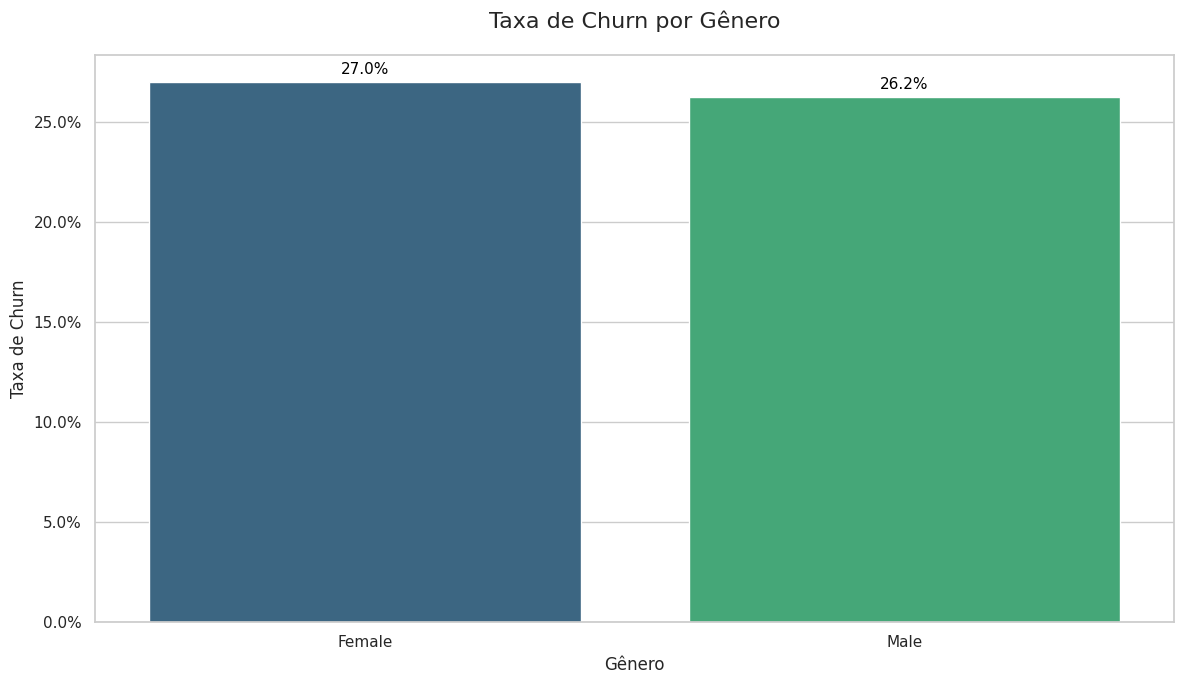


--- Taxa de Churn por: Cliente Idoso (SeniorCitizen) ---
| Cliente Idoso   |   Taxa de Churn |
|:----------------|----------------:|
| Sim             |          41.68% |
| Não             |          23.65% |


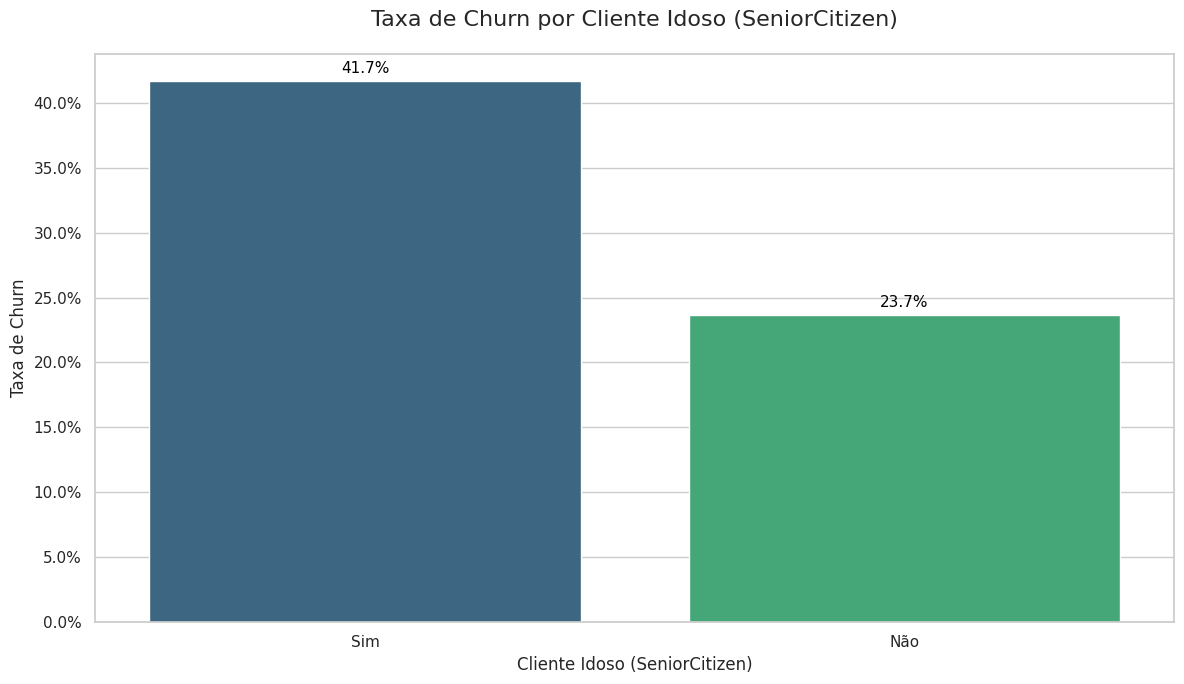


--- Taxa de Churn por: Possui Parceiro(a) ---
| Partner   |   Taxa de Churn |
|:----------|----------------:|
| No        |          32.98% |
| Yes       |          19.72% |


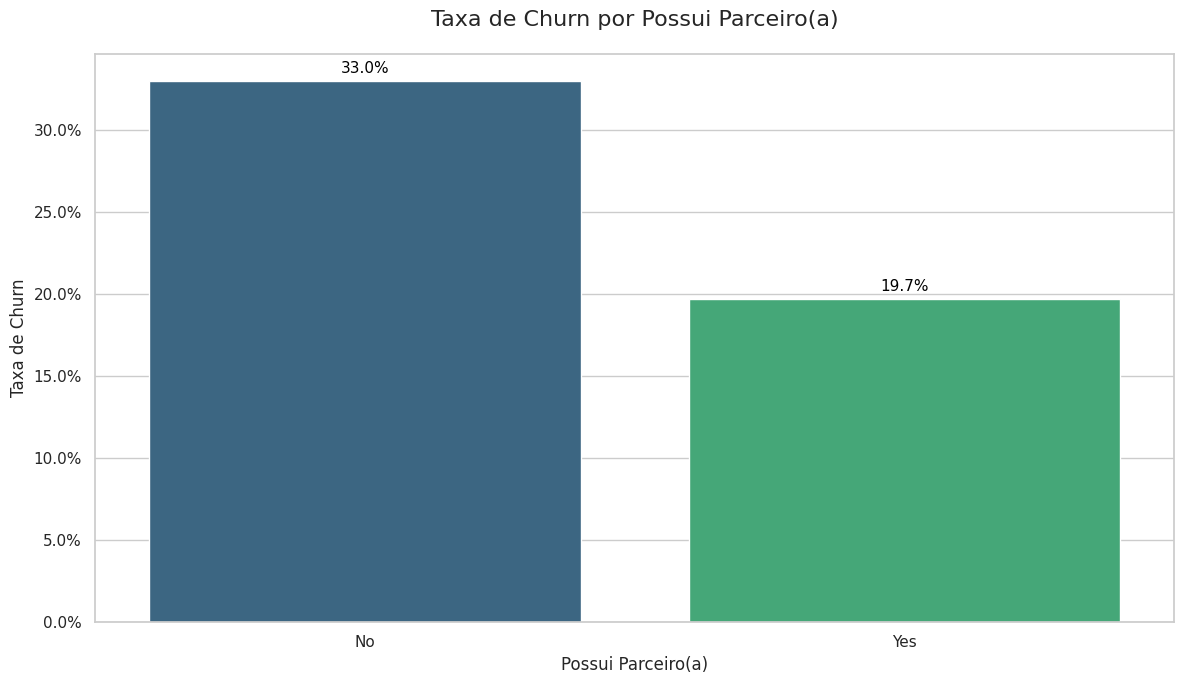


--- Taxa de Churn por: Possui Dependentes ---
| Dependents   |   Taxa de Churn |
|:-------------|----------------:|
| No           |          31.28% |
| Yes          |          15.53% |


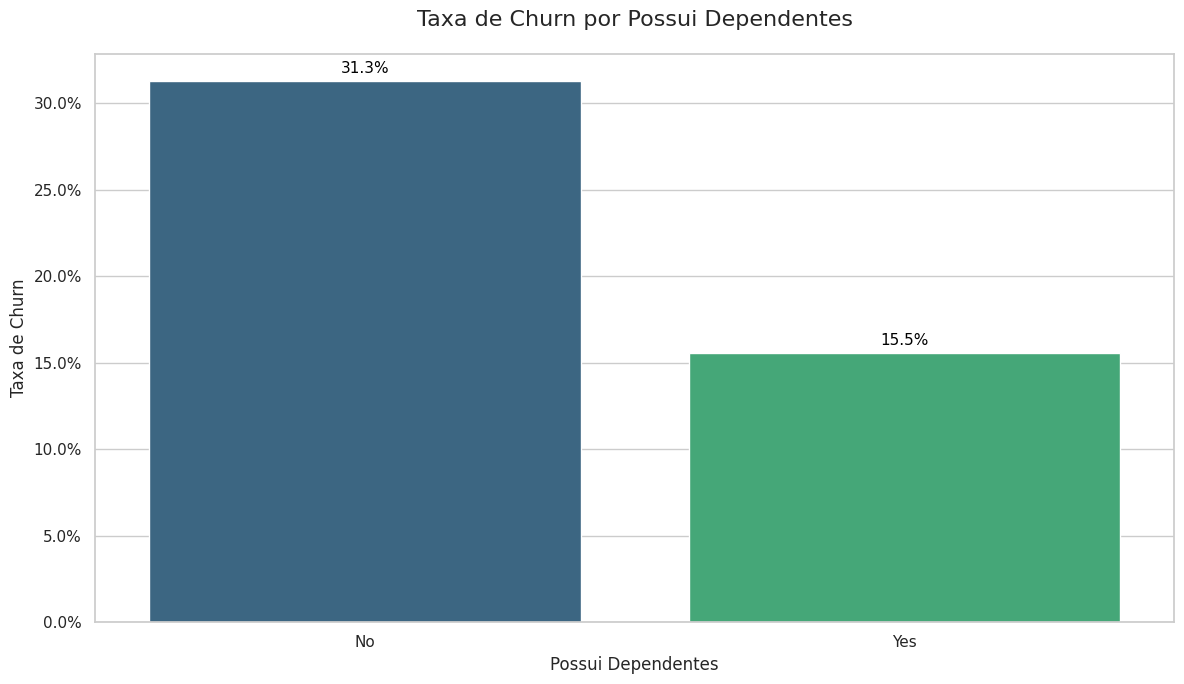


--- Taxa de Churn por: Tipo de Contrato ---
| Contract       |   Taxa de Churn |
|:---------------|----------------:|
| Month-to-month |          42.71% |
| One year       |          11.28% |
| Two year       |           2.85% |


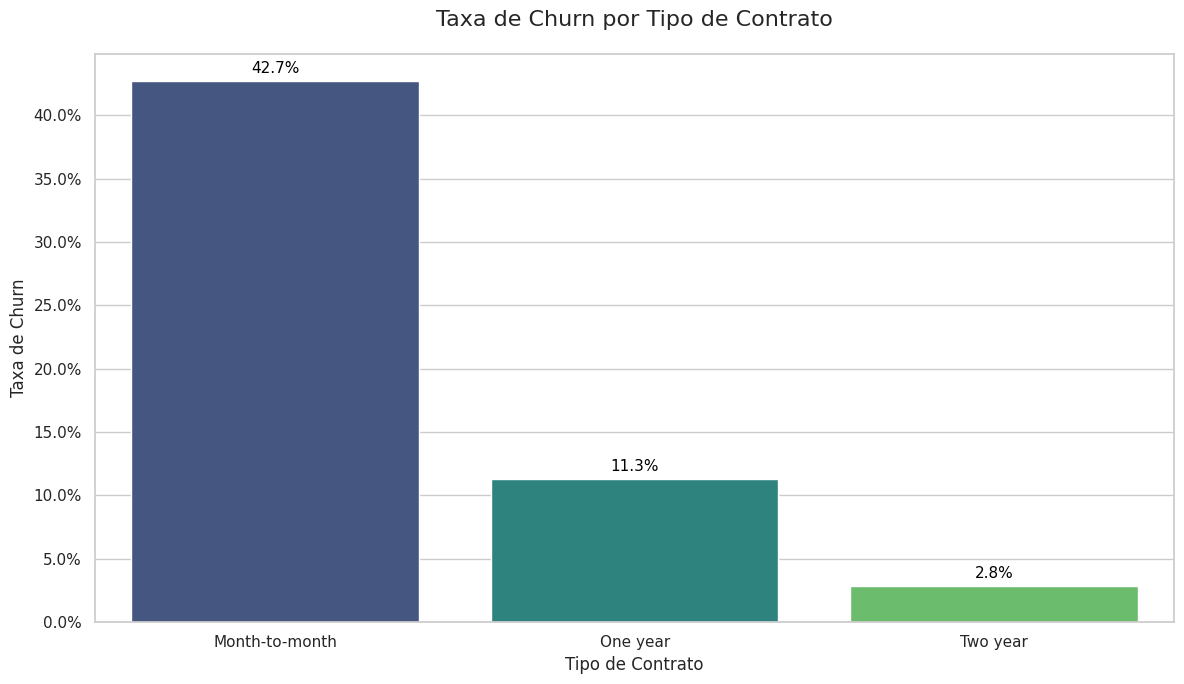


--- Taxa de Churn por: Método de Pagamento ---
| PaymentMethod             |   Taxa de Churn |
|:--------------------------|----------------:|
| Electronic check          |          45.29% |
| Mailed check              |          19.20% |
| Bank transfer (automatic) |          16.73% |
| Credit card (automatic)   |          15.25% |


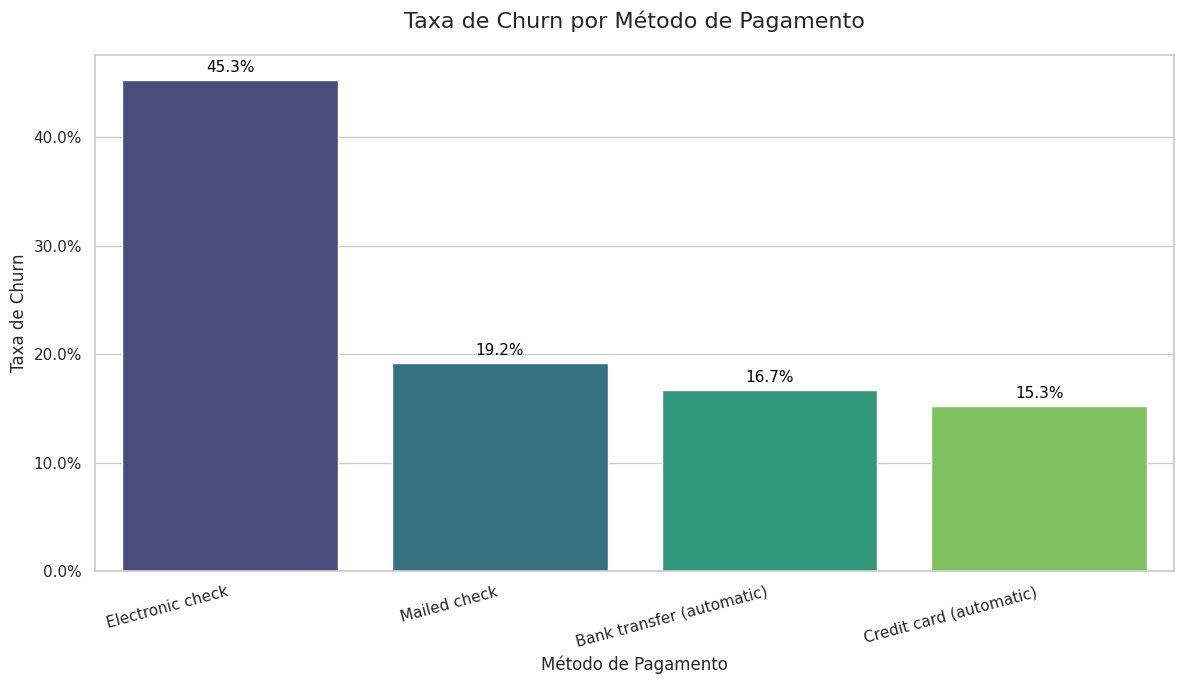


--- Taxa de Churn por: Fatura Digital (Paperless Billing) ---
| PaperlessBilling   |   Taxa de Churn |
|:-------------------|----------------:|
| Yes                |          33.59% |
| No                 |          16.38% |


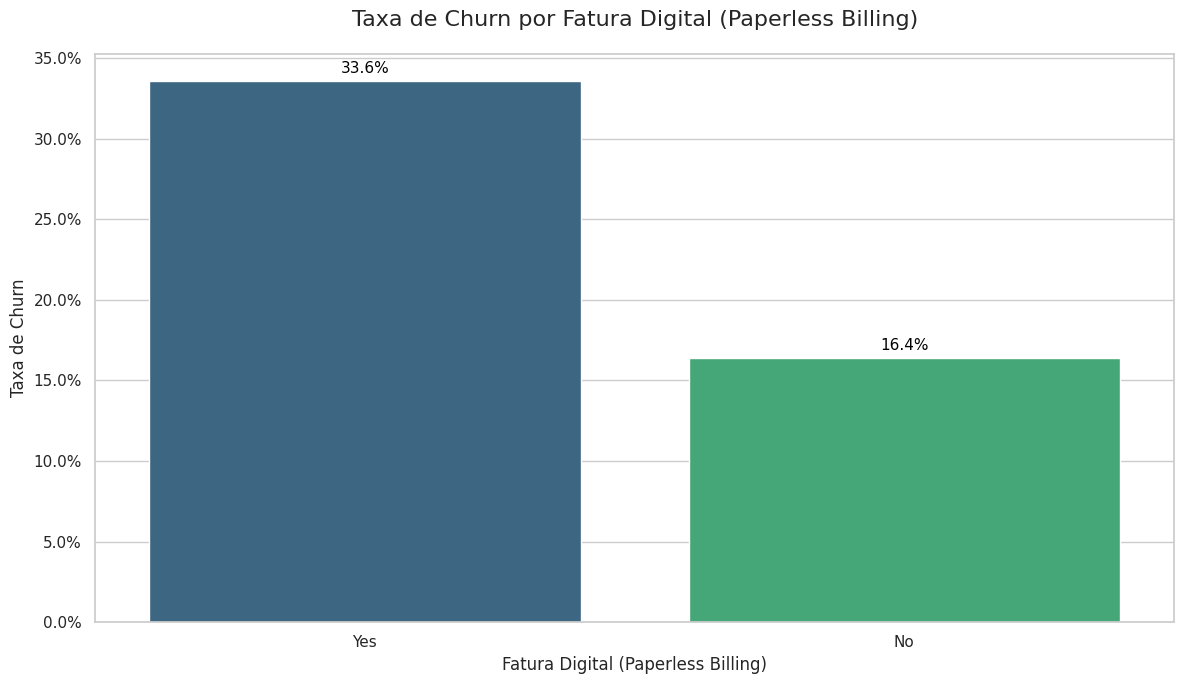

In [ ]:
# --- 2. Análise: Perfil Demográfico e Contrato ---

print("\n\n--- Etapa 2: Análise por Perfil Demográfico e Contrato ---")
print("Gerando tabelas e gráficos para Perfil Demográfico...")

# Renomear para o gráfico ficar melhor
df.rename(columns={'SeniorCitizen_Label': 'Cliente Idoso'}, inplace=True)

colunas_perfil = [
    'gender', 'Cliente Idoso', 'Partner', 'Dependents',
    'Contract', 'PaymentMethod', 'PaperlessBilling'
]

titulos_perfil = {
    'gender': 'Gênero',
    'Cliente Idoso': 'Cliente Idoso (SeniorCitizen)',
    'Partner': 'Possui Parceiro(a)',
    'Dependents': 'Possui Dependentes',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'Método de Pagamento',
    'PaperlessBilling': 'Fatura Digital (Paperless Billing)'
}

for col in colunas_perfil:
    titulo_amigavel = titulos_perfil.get(col, col)
    print(f"\n--- Taxa de Churn por: {titulo_amigavel} ---")

    churn_rate_group = df.groupby(col)['Churn_Numeric'].mean().reset_index()
    churn_rate_group = churn_rate_group.sort_values(by='Churn_Numeric', ascending=False)
    churn_rate_group.rename(columns={'Churn_Numeric': 'Taxa de Churn'}, inplace=True)

    # Imprimir a tabela (ótimo para o notebook)
    print(churn_rate_group.to_markdown(index=False, floatfmt=".2%"))

    # Gerar o gráfico
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(data=churn_rate_group, x=col, y='Taxa de Churn', palette='viridis')

    ax.set_title(f'Taxa de Churn por {titulo_amigavel}', fontsize=16, pad=20)
    ax.set_xlabel(titulo_amigavel, fontsize=12)
    ax.set_ylabel('Taxa de Churn', fontsize=12)

    # Usando nossas funções auxiliares
    formatar_eixo_pct(ax)
    adicionar_rotulos_barras(ax)

    if col == 'PaymentMethod':
        plt.xticks(rotation=15, ha='right')

    plt.tight_layout()
    plt.show() # exibe o gráfico no notebook
    plt.close()

Este bloco responde à pergunta: "Quais serviços estão ligados ao churn?". Primeiro, traduzimos os valores ("Yes", "No internet service") para português para os gráficos ficarem melhores. Em seguida, rodei um loop similar ao anterior para analisar o impacto de serviços como InternetService, TechSupport e OnlineSecurity na taxa de cancelamento.



--- Etapa 3: Análise por Serviços Contratados ---
Gerando tabelas e gráficos para Serviços Contratados...

--- Taxa de Churn por: Serviço de Telefone ---
| PhoneService   |   Taxa de Churn |
|:---------------|----------------:|
| Sim            |          26.75% |
| Não            |          25.00% |


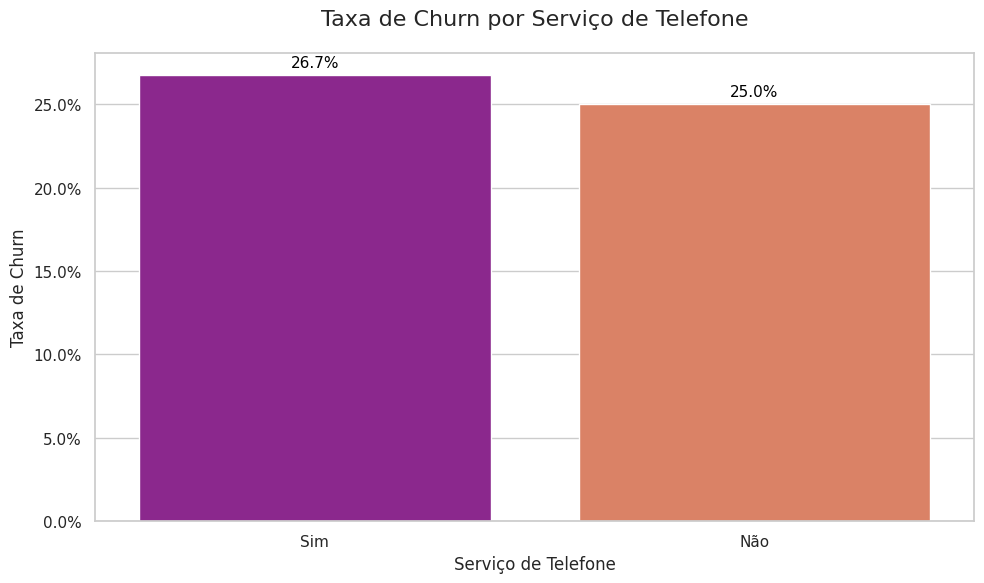


--- Taxa de Churn por: Múltiplas Linhas ---
| MultipleLines    |   Taxa de Churn |
|:-----------------|----------------:|
| Sim              |          28.65% |
| Não              |          25.08% |
| Sem serviço tel. |          25.00% |


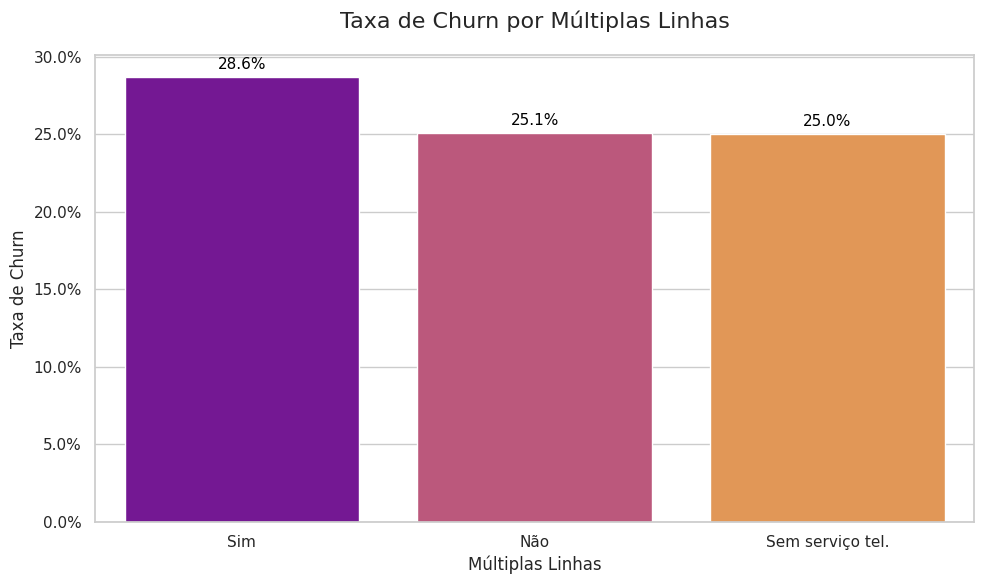


--- Taxa de Churn por: Tipo de Serviço de Internet ---
| InternetService   |   Taxa de Churn |
|:------------------|----------------:|
| Fibra Ótica       |          41.89% |
| DSL               |          19.00% |
| Sem Internet      |           7.43% |


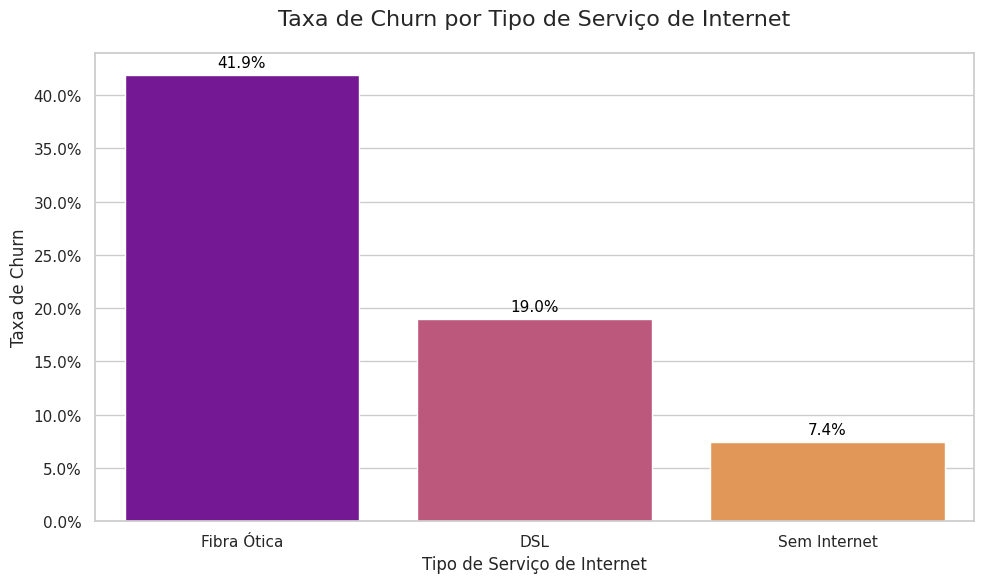


--- Taxa de Churn por: Segurança Online ---
| OnlineSecurity   |   Taxa de Churn |
|:-----------------|----------------:|
| Não              |          41.78% |
| Sim              |          14.64% |
| Sem Internet     |           7.43% |


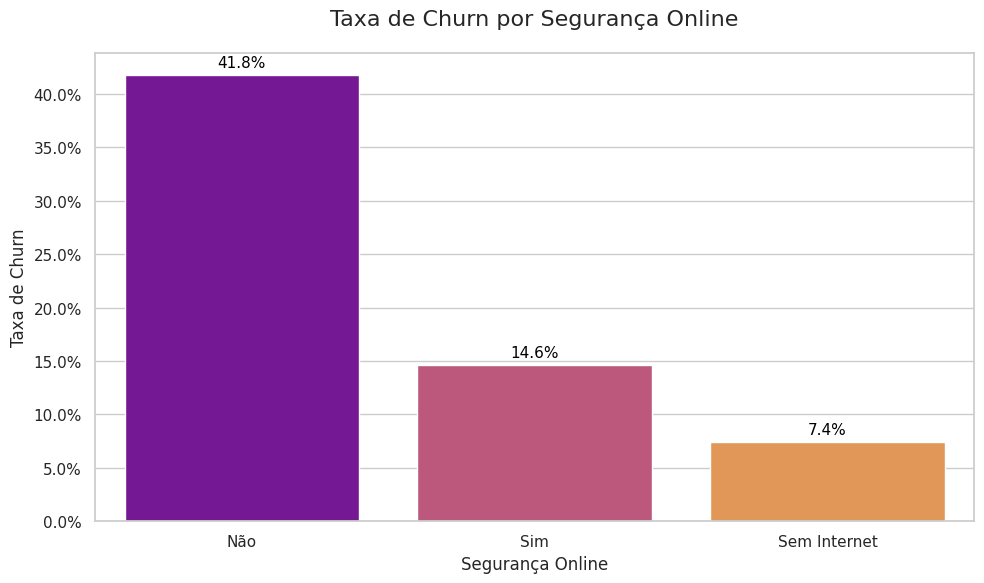


--- Taxa de Churn por: Backup Online ---
| OnlineBackup   |   Taxa de Churn |
|:---------------|----------------:|
| Não            |          39.94% |
| Sim            |          21.57% |
| Sem Internet   |           7.43% |


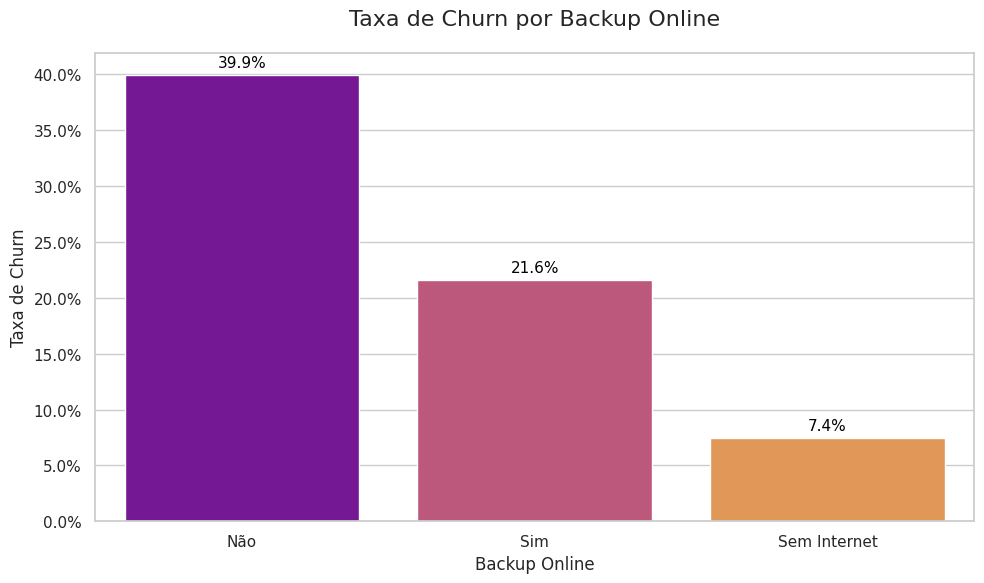


--- Taxa de Churn por: Proteção de Dispositivo ---
| DeviceProtection   |   Taxa de Churn |
|:-------------------|----------------:|
| Não                |          39.14% |
| Sim                |          22.54% |
| Sem Internet       |           7.43% |


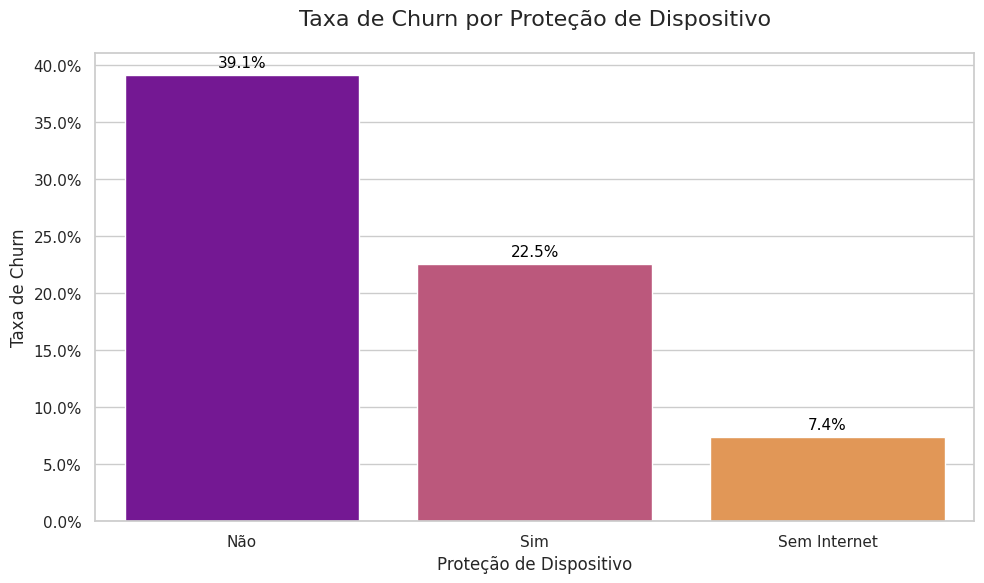


--- Taxa de Churn por: Suporte Técnico ---
| TechSupport   |   Taxa de Churn |
|:--------------|----------------:|
| Não           |          41.65% |
| Sim           |          15.20% |
| Sem Internet  |           7.43% |


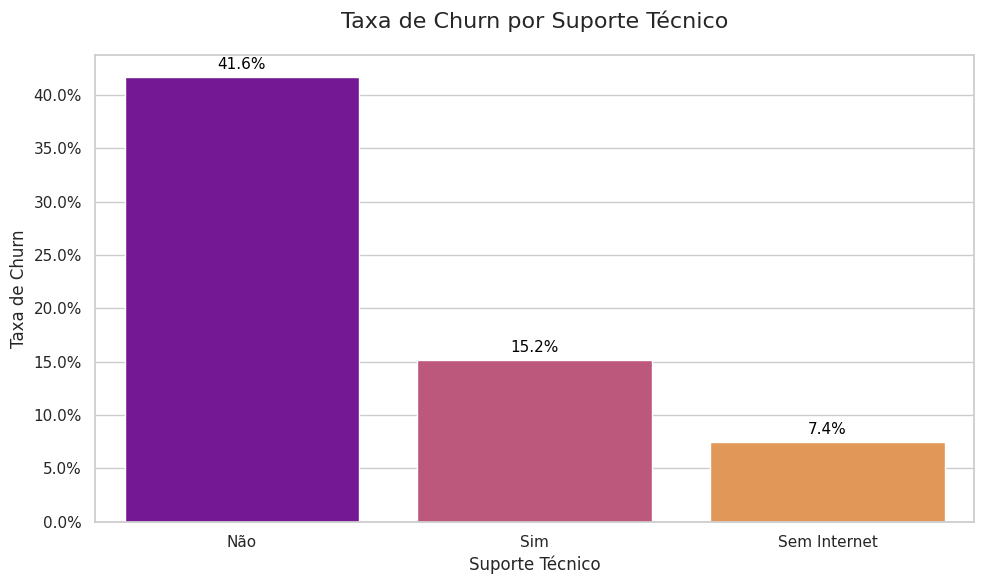


--- Taxa de Churn por: Streaming de TV ---
| StreamingTV   |   Taxa de Churn |
|:--------------|----------------:|
| Não           |          33.54% |
| Sim           |          30.11% |
| Sem Internet  |           7.43% |


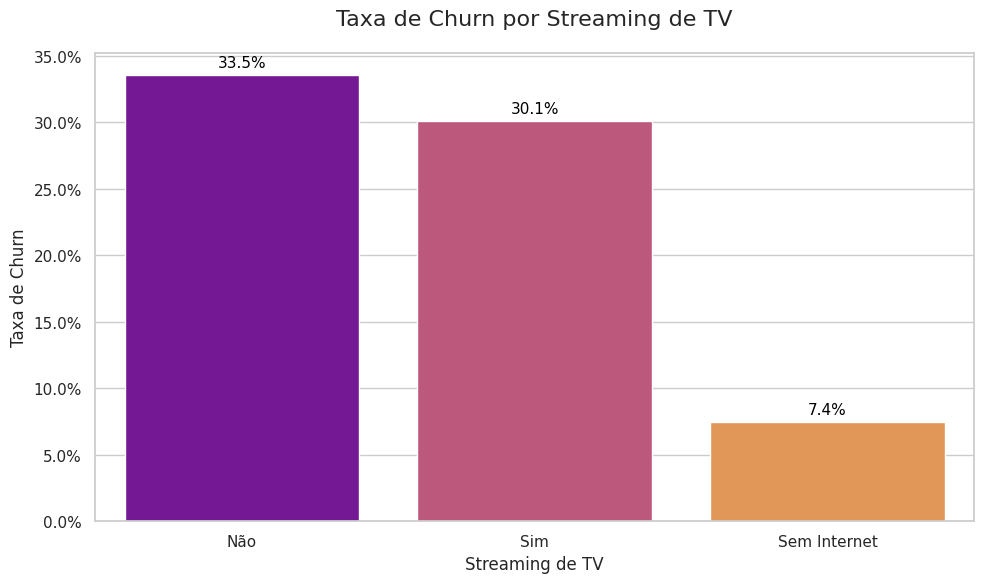


--- Taxa de Churn por: Streaming de Filmes ---
| StreamingMovies   |   Taxa de Churn |
|:------------------|----------------:|
| Não               |          33.73% |
| Sim               |          29.95% |
| Sem Internet      |           7.43% |


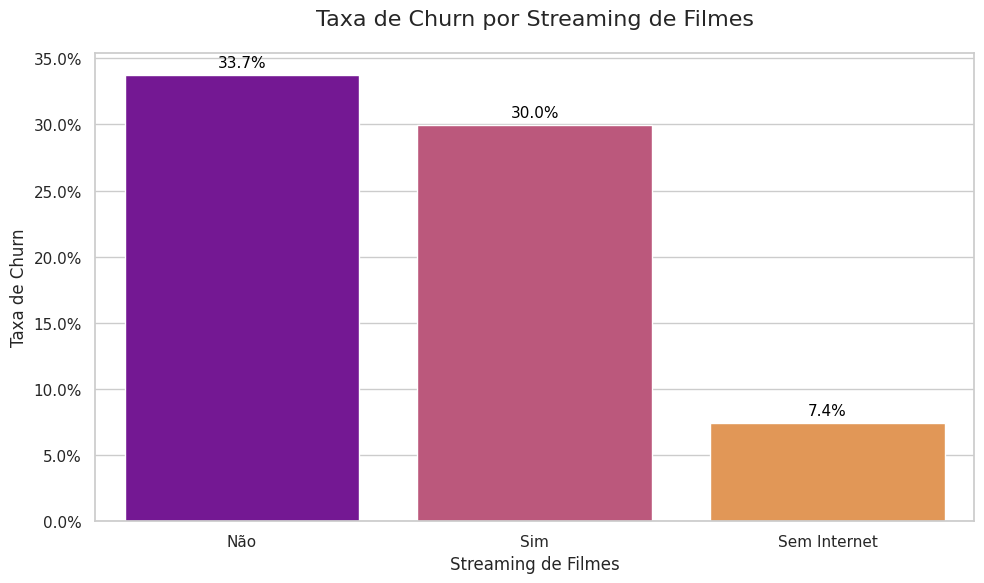

In [ ]:
# --- 3. Análise: Serviços Contratados (Tech Support, etc.) ---

print("\n\n--- Etapa 3: Análise por Serviços Contratados ---")
print("Gerando tabelas e gráficos para Serviços Contratados...")

# Mapear valores em inglês para português para os gráficos
map_yes_no = {'Yes': 'Sim', 'No': 'Não'}
df['PhoneService'] = df['PhoneService'].map(map_yes_no)
df['MultipleLines'] = df['MultipleLines'].map({**map_yes_no, 'No phone service': 'Sem serviço tel.'})
df['InternetService'] = df['InternetService'].map({'DSL': 'DSL', 'Fiber optic': 'Fibra Ótica', 'No': 'Sem Internet'})
map_internet_services = {**map_yes_no, 'No internet service': 'Sem Internet'}
servicos_internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in servicos_internet_cols:
    df[col] = df[col].map(map_internet_services)

colunas_servicos = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

titulos_servicos = {
    'PhoneService': 'Serviço de Telefone',
    'MultipleLines': 'Múltiplas Linhas',
    'InternetService': 'Tipo de Serviço de Internet',
    'OnlineSecurity': 'Segurança Online',
    'OnlineBackup': 'Backup Online',
    'DeviceProtection': 'Proteção de Dispositivo',
    'TechSupport': 'Suporte Técnico',
    'StreamingTV': 'Streaming de TV',
    'StreamingMovies': 'Streaming de Filmes'
}

for col in colunas_servicos:
    titulo_amigavel = titulos_servicos.get(col, col)
    print(f"\n--- Taxa de Churn por: {titulo_amigavel} ---")

    churn_rate_group = df.groupby(col)['Churn_Numeric'].mean().reset_index()
    churn_rate_group = churn_rate_group.sort_values(by='Churn_Numeric', ascending=False)
    churn_rate_group.rename(columns={'Churn_Numeric': 'Taxa de Churn'}, inplace=True)

    # Imprimir a tabela
    print(churn_rate_group.to_markdown(index=False, floatfmt=".2%"))

    # Gerar o gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=churn_rate_group, x=col, y='Taxa de Churn', palette='plasma')

    ax.set_title(f'Taxa de Churn por {titulo_amigavel}', fontsize=16, pad=20)
    ax.set_xlabel(titulo_amigavel, fontsize=12)
    ax.set_ylabel('Taxa de Churn', fontsize=12)

    # Usando nossas funções auxiliares
    formatar_eixo_pct(ax)
    adicionar_rotulos_barras(ax)

    plt.tight_layout()
    plt.show()
    plt.close()

# Relatório Final: Análise de Churn da Telco

## 1. Resumo Executivo

A análise dos dados de 7.032 clientes revelou uma taxa de churn geral de **26.58%**. Este cancelamento não é aleatório, mas sim impulsionado por um conjunto claro de fatores. Os clientes estão cancelando devido a uma combinação de **contratos inflexíveis (Mês a Mês), métodos de pagamento de alto atrito (Cheque Eletrônico) e uma percepção de baixo valor nos serviços (especialmente Fibra Ótica sem Suporte Técnico).**

## 2. O que Encontrei nos Gráficos (Resultados da Análise)

Abaixo está um resumo do que cada grupo de gráficos nos revelou nas etapas anteriores.

### 2.1 Análise por Perfil e Contrato (Gráficos da Etapa 2)

Estes gráficos buscaram entender o "quem" e "como" do churn.

* **Gráfico: Taxa de Churn por Tipo de Contrato**
    * **O que achei:** Este é o fator **mais forte** de todos. Clientes com contrato `Month-to-month` (Mês a Mês) têm uma taxa de churn de **42.71%**. Clientes com contratos de `One year` (11.28%) ou `Two year` (2.85%) são extremamente fiéis.

* **Gráfico: Taxa de Churn por Método de Pagamento**
    * **O que achei:** Clientes que usam `Electronic check` (Cheque Eletrônico) cancelam muito mais (**45.29%**). Todos os métodos automáticos (cartão ou banco) têm taxas de churn baixas (abaixo de 17%).

* **Gráfico: Taxa de Churn por Cliente Idoso**
    * **O que achei:** Clientes idosos (`SeniorCitizen`) têm uma taxa de churn de **41.68%**, quase o dobro dos clientes mais jovens (23.65%).

* **Gráfico: Taxa de Churn por Parceiro(a) e Dependentes**
    * **O que achei:** Clientes que moram sozinhos (sem `Partner` ou `Dependents`) são mais propensos a cancelar (churn acima de 31%) do que clientes com família (churn abaixo de 20%).

### 2.2 Análise por Serviços Contratados (Gráficos da Etapa 3)

Estes gráficos buscaram entender a relação entre os serviços (Internet, Suporte, etc.) e o cancelamento.

* **Gráfico: Taxa de Churn por Suporte Técnico (TechSupport)**
    * **O que achei:** A correlação é fortíssima. Clientes que **NÃO** assinam o Suporte Técnico (`TechSupport` = Não) têm uma taxa de churn de **41.65%**. Clientes que assinam o serviço quase não cancelam (churn de 15.20%).

* **Gráfico: Taxa de Churn por Segurança Online (OnlineSecurity)**
    * **O que achei:** O mesmo padrão. Sem Segurança Online, o churn é de **41.78%**. Com o serviço, o churn cai para 14.64%.

* **Gráfico: Taxa de Churn por Tipo de Serviço de Internet**
    * **O que achei (O Paradoxo):** Clientes com `Fiber optic` (Fibra Ótica) têm uma taxa de churn altíssima de **41.89%**.
    * **Conclusão (Cruzando dados):** A Fibra é um serviço mais caro. Os clientes que a contratam *sem* os serviços de proteção (Suporte e Segurança) sentem que estão pagando caro por um serviço sem valor agregado, e por isso cancelam.

### 2.3 Análise por Variáveis Numéricas (Gráficos da Etapa 4)

Estes gráficos (KDE e Boxplot) buscaram entender o comportamento do churn em relação a tempo e dinheiro.

* **Gráfico: Distribuição de Tenure (Tempo como Cliente)**
    * **O que achei:** O churn está massivamente concentrado em **clientes novos**. O gráfico de densidade mostra um pico de cancelamentos (curva "Sim") nos primeiros meses de contrato. Clientes antigos (com `tenure` alto) raramente cancelam.

* **Gráfico: Distribuição de Cobrança Mensal (MonthlyCharges)**
    * **O que achei:** Os gráficos mostram claramente que os clientes que cancelam (`Churn` = Sim) pagavam, em média, contas mensais mais altas do que os clientes que ficaram.

## 3. Resposta às Perguntas de Negócio

1.  **Quais são os fatores predominantes?**
    * Tipo de Contrato (`Month-to-month`).
    * Método de Pagamento (`Electronic check`).
    * Falta de Serviços de Proteção (`TechSupport` = Não e `OnlineSecurity` = Não).

2.  **Qual é o perfil dos clientes que mais cancelam?**
    * É um cliente **Idoso**, que mora **sozinho**.
    * É um cliente **novo** (baixo `tenure`).
    * Possui contrato **Mês a Mês** e paga com **Cheque Eletrônico**.
    * Assina **Fibra Ótica**, mas **não** assina Suporte Técnico ou Segurança Online.

3.  **Existe correlação entre chamados de suporte e cancelamento?**
    * Sim. A **ausência** da assinatura do serviço de `TechSupport` está ligada a um aumento de churn de 15.20% para 41.65%.

4.  **Como aumentar a retenção (diminuir o churn)?**
    * Com base nos dados, as estratégias estão na seção abaixo.

## 4. Recomendações Estratégicas

1.  **Ação Imediata em Contratos:** Focar agressivamente na migração de clientes "Mês a Mês" para contratos de "1 Ano". Oferecer um pequeno desconto ou um serviço de streaming como incentivo.
2.  **Redução de Atrito no Pagamento:** Desencorajar ativamente o "Cheque Eletrônico". Oferecer um desconto único (ex: R$ 10 na próxima fatura) para clientes que migrarem para Débito Automático ou Cartão.
3.  **Bundle de Proteção para Fibra Ótica:** Para justificar o preço da Fibra e reduzir seu churn, o "Suporte Técnico" e a "Segurança Online" devem ser oferecidos como um **pacote gratuito nos primeiros 6 ou 12 meses** para todos os novos clientes de Fibra.

# Autoavaliação e Considerações Finais
Acredito que os objetivos traçados inicialmente foram plenamente atingidos. Consegui identificar que o tipo de contrato "Mês a Mês" (42,7% de churn) e o método de pagamento "Cheque Eletrônico" (45,3%) são os principais detratores da retenção. A hipótese sobre o impacto do suporte técnico também foi confirmada: a ausência desse serviço triplica a chance de cancelamento.
+1

A maior dificuldade técnica foi na etapa de limpeza de dados (Data Wrangling), especificamente na conversão da coluna TotalCharges. O fato de haver espaços vazios sendo interpretados como texto exigiu o uso de coerção de tipos (errors='coerce') para revelar os valores nulos ocultos. Além disso, a modelagem dos dados para garantir que a tipagem estivesse correta antes da plotagem exigiu um mapeamento cuidadoso de variáveis categóricas para o português.
+3

Para enriquecer este portfólio, pretendo:

Pretendo utilizar algoritmos de Machine Learning (como Random Forest ou XGBoost) para prever a probabilidade individual de churn.

Gostaria de evoluir o script atual para um pipeline de ETL robusto utilizando AWS Glue.

Para este MVP, utilizei a plataforma Databricks (dbc-6ba4cdc0-9ce0.cloud.databricks.com) para realizar o processo de ETL e persistência em nuvem. No entanto, por utilizar a versão gratuita da ferramenta, o cluster e as tabelas ficam temporariamente desativados após períodos de inatividade. Por esse motivo, exportei e hospedei o resultado final do tratamento de dados diretamente no GitHub, garantindo a disponibilidade e linhagem dos dados para avaliação.

Caminho dos Dados e Tabelas:

Camada de Processamento (Databricks): O tratamento foi estruturado nas tabelas telecobase (dados brutos/limpeza) e telco_churn_gold (dados prontos para análise).

Links de Referência:

https://dbc-6ba4cdc0-9ce0.cloud.databricks.com/explore/data/workspace/default/telco_churn_gold?o=3056796591279923

https://dbc-6ba4cdc0-9ce0.cloud.databricks.com/explore/data/workspace/default/telecobase?o=3056796591279923&activeTab=overview


https://raw.githubusercontent.com/rodolphomh/MVP-Engenharia-de-Dados/main/WA_Fn-UseC_-Telco-Customer-Churn.csv